<a href="https://colab.research.google.com/github/meurii/ProjetoRegressaoLinear/blob/main/PROJETO_UNIDADE_9_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# vamo começar importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score, confusion_matrix, mean_absolute_error

In [ ]:
# pra o programa não ficar vinculado ao arquivo do drive, vamo carregar o dataset do kaggle aqi direto:

!pip install kaggle
!kaggle datasets download -d surajjha101/top-instagram-influencers-data-cleaned --force  #-> o --force é pra forçar p download
!unzip -oq "top-instagram-influencers-data-cleaned.zip"  #-> aqi a gente extrai o arquivo zip
!ls  #-> aqi a gente lista os arquivos, pra encontrar o nome do csv (que, nesse caso, é top_insta_influencers_data)

Dataset URL: https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned
License(s): CC0-1.0
  0% 0.00/5.89k [00:00<?, ?B/s]
100% 5.89k/5.89k [00:00<00:00, 4.46MB/s]
sample_data  top-instagram-influencers-data-cleaned.zip  top_insta_influencers_data.csv


In [ ]:
df = pd.read_csv ('top_insta_influencers_data.csv')  #-> aqi a gente carrega o csv pra um DataFrame, que vamo chamar de df
df.head()  #-> vamo só dar uma olhadinha no DataFrame

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# pra visualização da tabela ficar melhor, vamo renomear os nomes das colunas

df.rename(columns={'rank':'classificacao','channel_info':'nome','influence_score':'pontuacao','posts':'postagens','followers':'seguidores','avg_likes':'media_de_curtidas','60_day_eng_rate':'taxa_de_engajamento','new_post_avg_like':'media_de_curtidas_novas','total_likes':'likes','country':'país'}, inplace=True)

In [ ]:
# pra conferir que deu tudo certo na renomeação:
df.head()

,classificacao,nome,pontuacao,postagens,seguidores,media_de_curtidas,taxa_de_engajamento,media_de_curtidas_novas,likes,país
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [ ]:
# dando uma geral nas infos dos dados, dá pra ver que algumas colunas precisam ser tratadas, de forma que os números apareçam sem nenhum caractere
# as colunas que precisam de ajuste são: 'postagens', 'seguidores', 'media_de_curtidas', 'taxa_de_engajamento', 'media_de_curtidas_novas' e 'likes'

def converter_caracteres (value):
  if isinstance(value,str):  #-> verifica se o valor é uma string
    if 'm' in value:
      return float (value.replace ('m','')) *1000000
    if 'k' in value:
      return float(value.replace('k','')) *1000
    if 'b' in value:
      return float(value.replace('b','')) *1000000000
    else:
      return float (value)  #->  caso não exista m, k ou b, só continua o número
  else:
    return (value)  #-> se já for númerico, retorna como tá

df_insta = pd.DataFrame()  #-> aqi a gente cria um novo DataFrame, pra qqr alteração que a gente for fazer na tabela, não alterar a fonte dos dados tbm

# Aplicando a função às colunas necessárias

colunas = ['postagens', 'seguidores', 'media_de_curtidas', 'media_de_curtidas_novas', 'likes']
for coluna in colunas:
  df_insta [coluna] = df [coluna].apply (converter_caracteres)

# Agora tem que retirar o simbolo de %

df_insta['taxa_de_engajamento'] = df['taxa_de_engajamento'].str.replace ('%','', regex=True).astype(float) / 100
df_insta ['país'] = df['país']  #->  só pra trazer a coluna pro novo DataFrame
df_insta['influenciador'] = df['nome']  #-> pra ficar de fácil entendimento, vamo trocar "nome" por "influenciador"
df_insta['pontuacao'] = df['pontuacao']  #-> só pra trazer a coluna pro novo DataFrame

df_insta.head()  #-> vamo confirmar se ele aplicou tudo direitinho

,postagens,seguidores,media_de_curtidas,media_de_curtidas_novas,likes,taxa_de_engajamento,país,influenciador,pontuacao
0,3300.0,475800000.0,8700000.0,6500000.0,2.900000e+10,0.0139,Spain,cristiano,92
1,6900.0,366200000.0,8300000.0,5900000.0,5.740000e+10,0.0162,United States,kyliejenner,91
2,890.0,357300000.0,6800000.0,4400000.0,6.000000e+09,0.0124,NaN,leomessi,90
3,1800.0,342700000.0,6200000.0,3300000.0,1.150000e+10,0.0097,United States,selenagomez,93
4,6800.0,334100000.0,1900000.0,665300.0,1.250000e+10,0.0020,United States,therock,91


In [ ]:
# revisando os dados:

#pra saber se tem valor nulo
print (df_insta.isnull().sum())  #-> temos 1 valor nulo de taxa_de_engajamento e 62 valores nulos de país

moda = df_insta ['país'].mode()[0]  #-> vamo substituir os valores nulos de 'País' pela moda dessa coluna
df_insta ['país'] = df_insta ['país'].fillna (moda)

media = df_insta ['taxa_de_engajamento'].mean()  #-> vamo substituir o valor nulo de 'Taxa de engajamento" pela média dessa coluna
df_insta['taxa_de_engajamento'] = df_insta['taxa_de_engajamento'].fillna (media)

# pra saber se tem dado duplicado

print (df_insta.duplicated().sum())

postagens                   0
seguidores                  0
media_de_curtidas           0
media_de_curtidas_novas     0
likes                       0
taxa_de_engajamento         1
país                       62
influenciador               0
pontuacao                   0
dtype: int64
0


In [ ]:
# vamo normalizar os dados pra manter as variáveis numéricas escaladas

from sklearn.preprocessing import MinMaxScaler

colunas_pra_normalizar = ['taxa_de_engajamento', 'postagens', 'seguidores', 'media_de_curtidas', 'media_de_curtidas_novas', 'likes', 'pontuacao']
scaler = MinMaxScaler ()
df_insta [colunas_pra_normalizar] = scaler.fit_transform (df_insta [colunas_pra_normalizar])

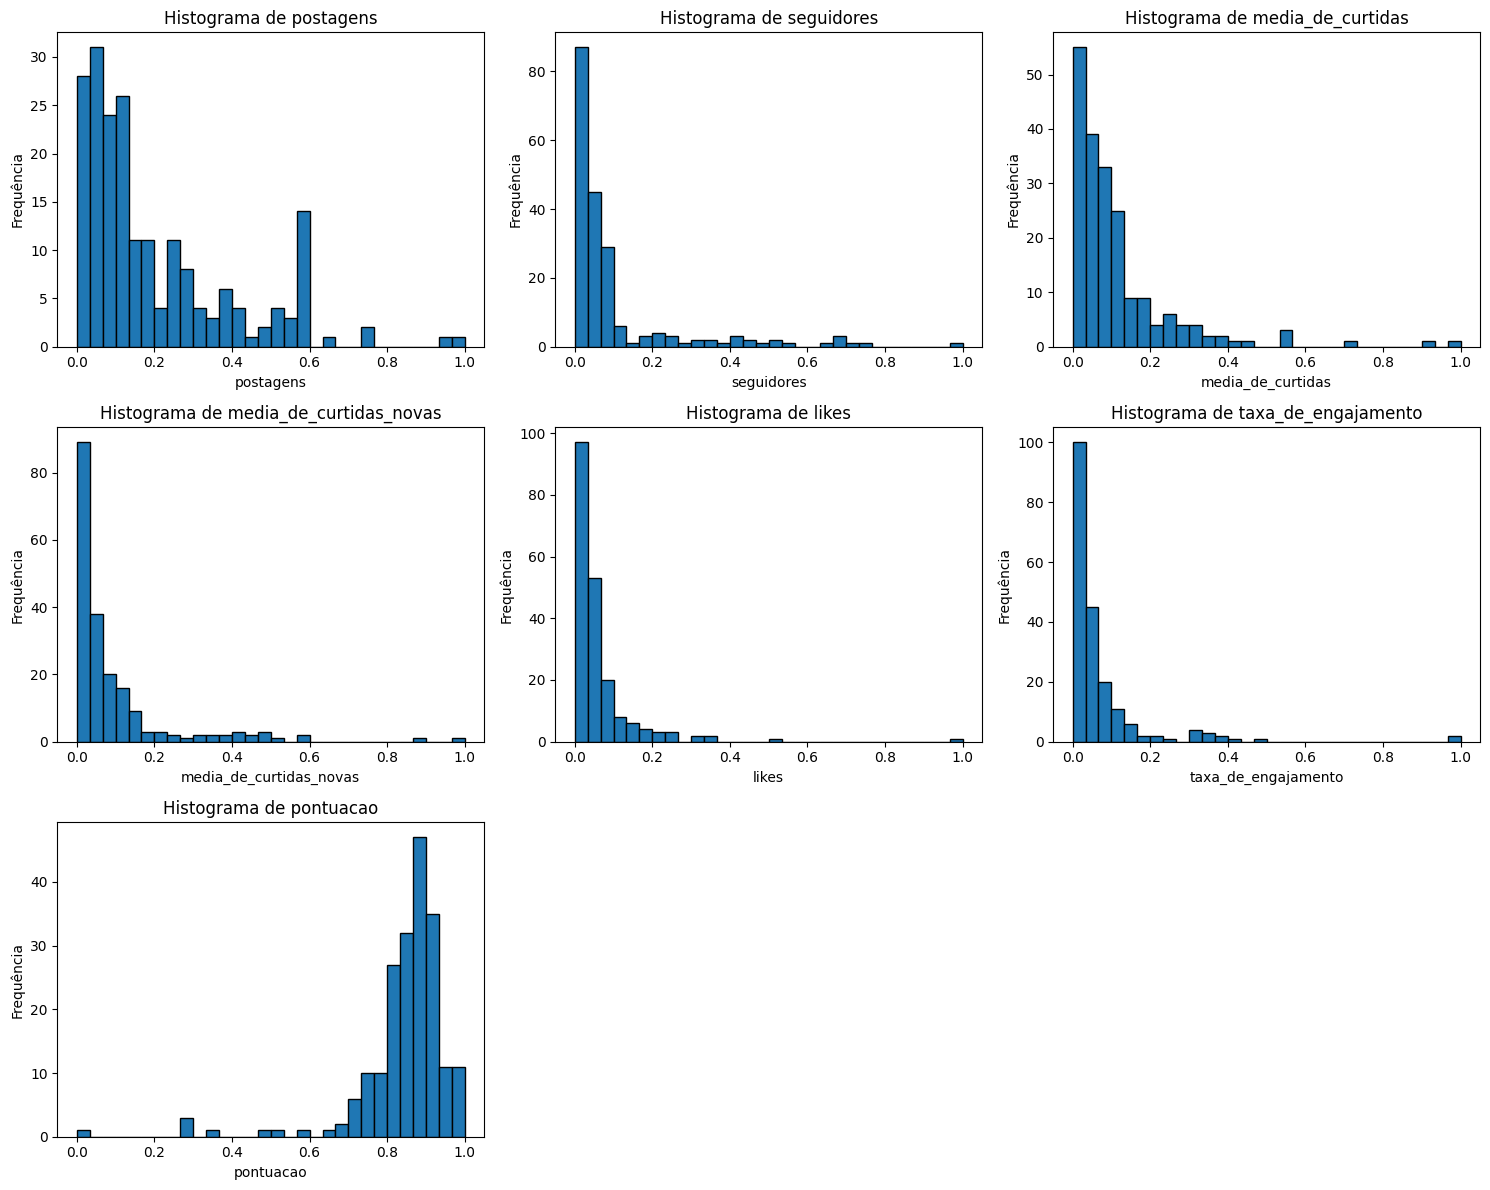

In [ ]:
# vamo fzr um histograma ds variáveis pra procurar possíveis outliers

variaveis_out = ['postagens', 'seguidores', 'media_de_curtidas', 'media_de_curtidas_novas', 'likes', 'taxa_de_engajamento', 'pontuacao']  #-> a lista das variáveis que a gente vai plotar os histogramas

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_out, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var}')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()

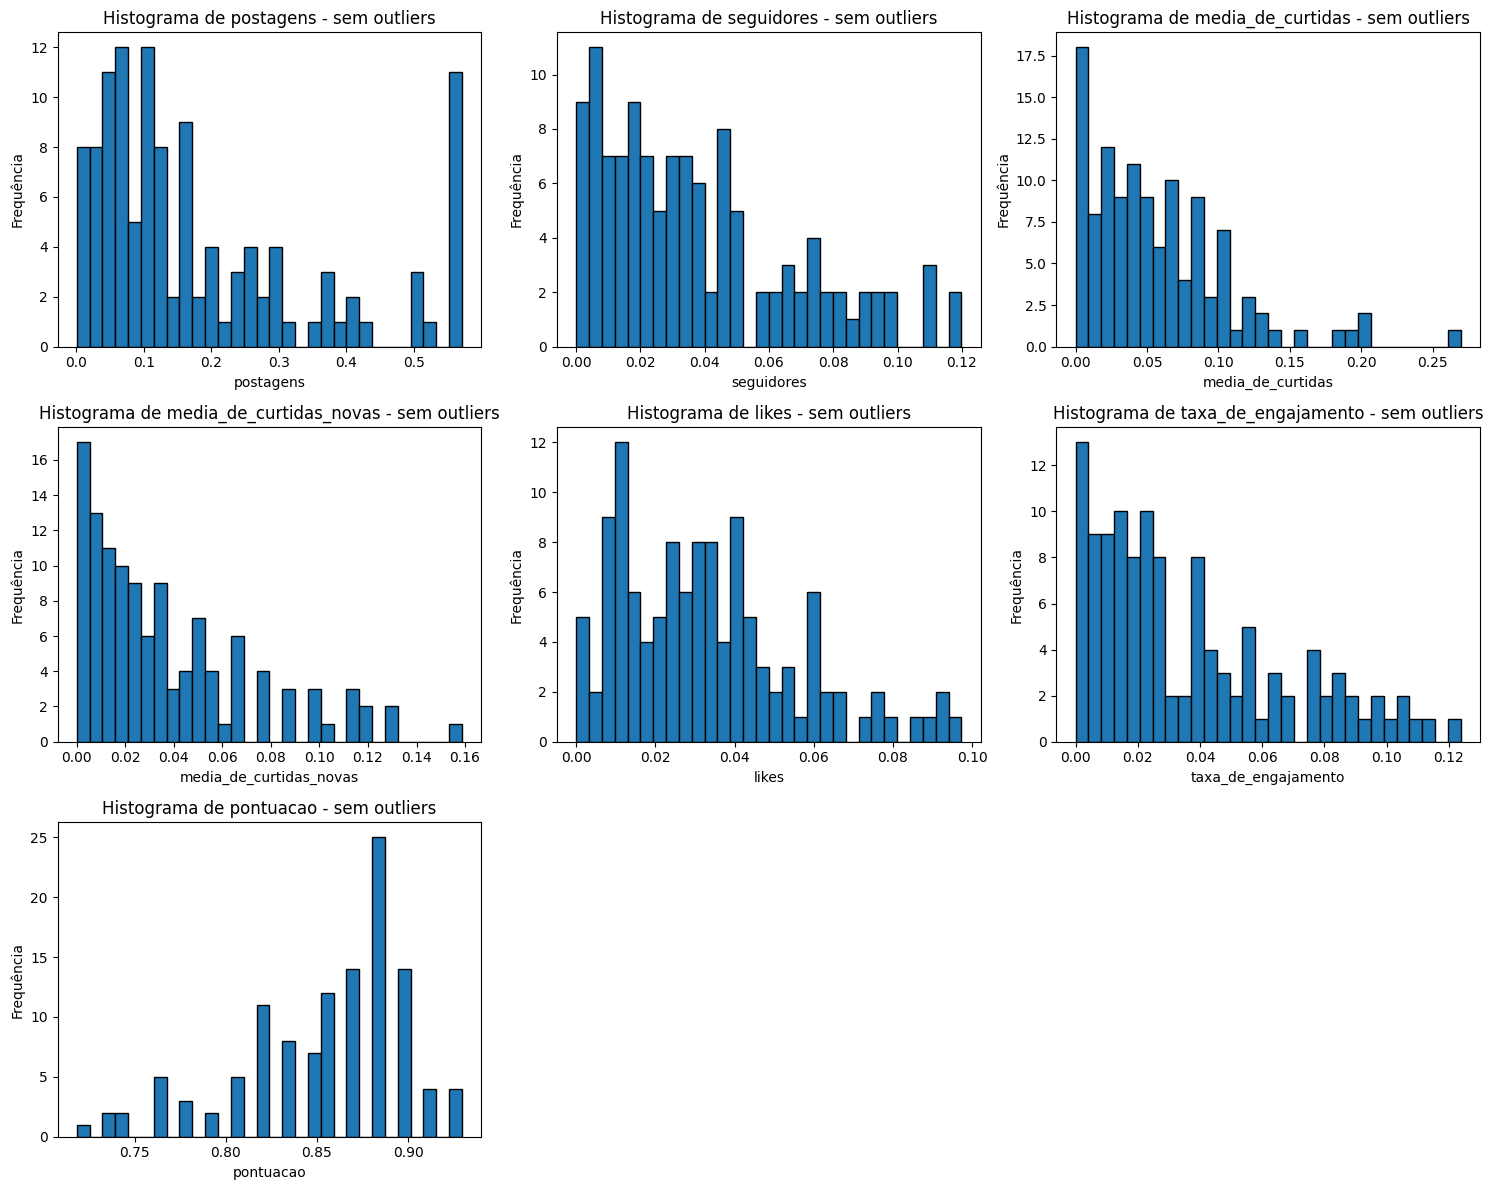

In [ ]:
# vamo tratar esses outliers pelo IQR

colunas = ['media_de_curtidas', 'postagens', 'seguidores', 'media_de_curtidas_novas', 'likes', 'taxa_de_engajamento', 'pontuacao']
for coluna in colunas:
  Q1 = df_insta [coluna].quantile (0.25)
  Q3 = df_insta [coluna]. quantile (0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR  #-> aqui a gente delimita o que consideramos outlier
  limite_superior = Q3 + 1.5 * IQR
  df_insta = df_insta [(df_insta [coluna] >= limite_inferior) & (df_insta [coluna] <= limite_superior)]

  variaveis_outliers = ['postagens', 'seguidores', 'media_de_curtidas', 'media_de_curtidas_novas', 'likes', 'taxa_de_engajamento', 'pontuacao']  #-> a lista das variáveis que a gente vai plotar os histogramas

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_outliers, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var} - sem outliers')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()  #-> vamo conferir se os outliers foram removidos

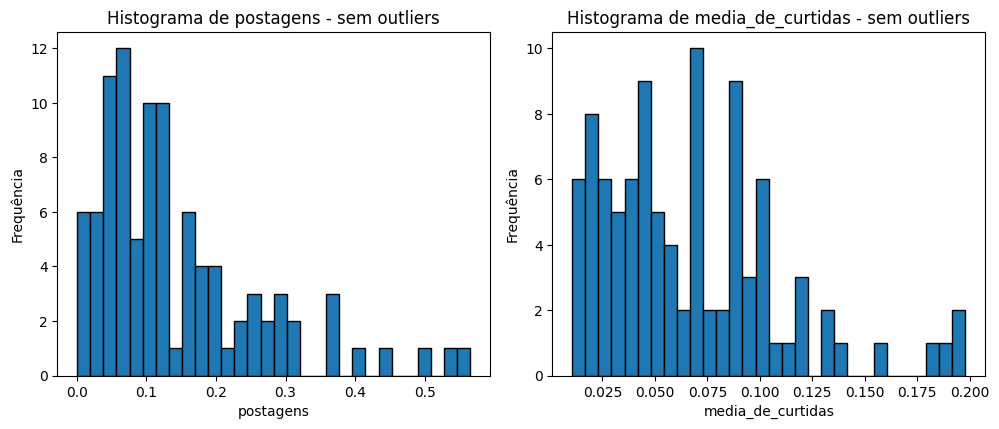

In [ ]:
# ele já deu uma tratadinha boa nos outliers, mas algumas ainda apresentam uns valores que podem ser mais ajustados, então vamo fzr individualmente e manualmente o tratamento de cada uma

limites = {'postagens': (0.0001, 0.57), 'media_de_curtidas': (0.01, 0.25)}

# Aplicar limites manualmente
df_filtrado = df_insta.copy()
for coluna, (lim_inferior, lim_superior) in limites.items():
    df_filtrado = df_filtrado[(df_filtrado[coluna] >= lim_inferior) & (df_filtrado[coluna] <= lim_superior)]
    variaveis_filtrado = [ 'postagens', 'media_de_curtidas']

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_filtrado, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_filtrado [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var} - sem outliers')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
# os histogramas não apresentam uma distribuição normal, então vamo tentar uma transformação logarítmica pra ver se isso melhora
# não vamo aplicar em 'pontuacao' pq ela não apresenta assimetria positiva

df_insta ['log_postagens'] = np.log1p (df_insta ['postagens'] +1)  #-> a gente add esse 1 aqi pra evitar o log(0)
df_insta ['log_seguidores'] = np.log1p (df_insta ['seguidores'] +1)
df_insta ['log_media_de_curtidas'] = np.log1p (df_insta ['media_de_curtidas'] +1)
df_insta ['log_media_de_curtidas_novas'] = np.log1p (df_insta ['media_de_curtidas_novas'] +1)
df_insta ['log_likes'] = np.log1p (df_insta ['likes'] +1)
df_insta ['log_taxa_de_engajamento'] = np.log1p (df_insta ['taxa_de_engajamento'] +1)  #-> vamo aplicar tbm na variavel alvo

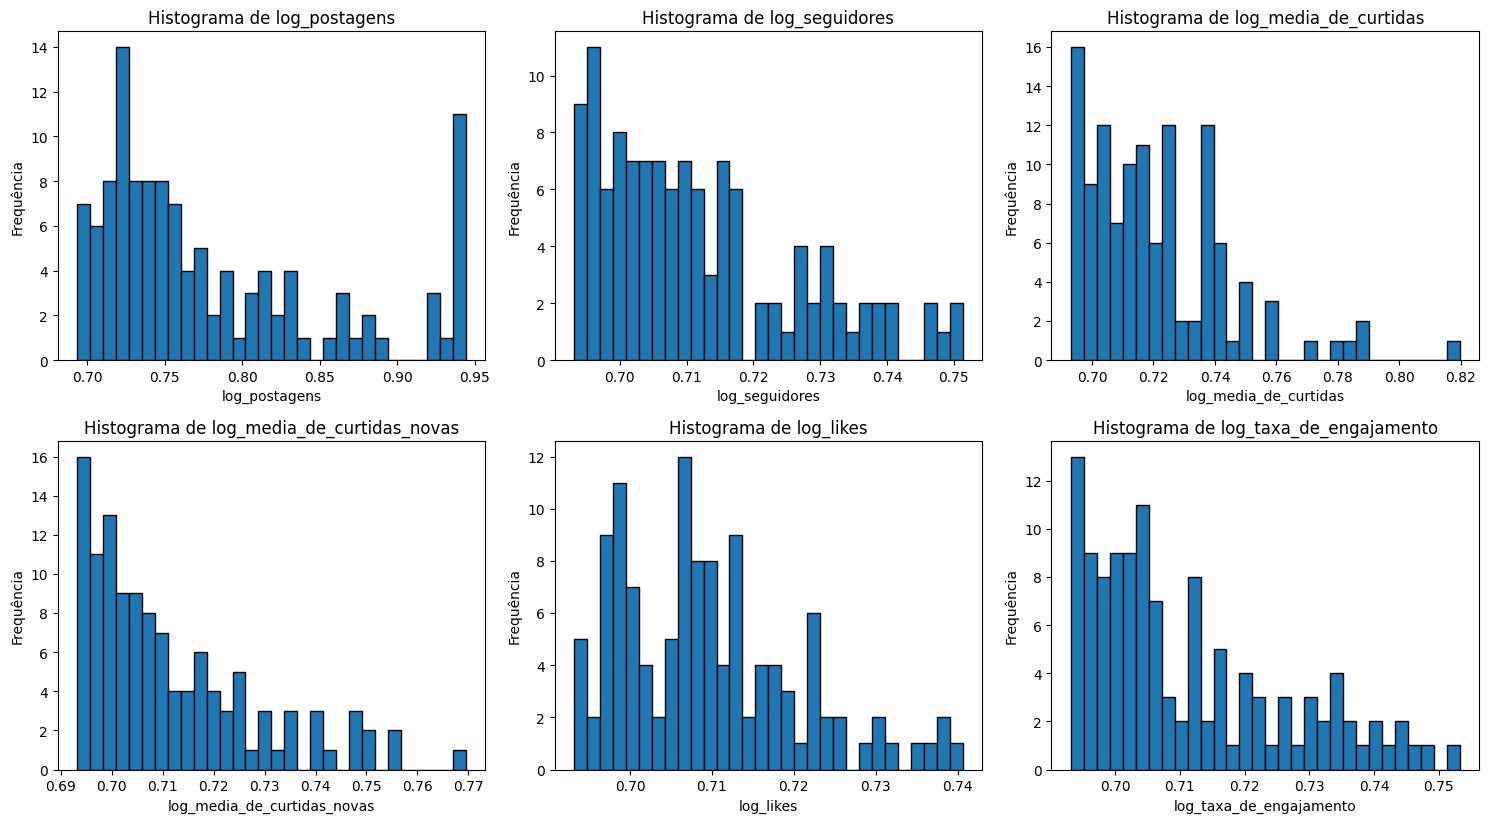

In [ ]:
# vamo plotar de novo os histogramas pra analisar o impacto da transformação

variaveis_out = ['log_postagens', 'log_seguidores', 'log_media_de_curtidas', 'log_media_de_curtidas_novas', 'log_likes', 'log_taxa_de_engajamento']  #-> a lista que a gente vai plotar

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_out, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var}')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

variaveis = ['log_postagens', 'log_seguidores', 'log_media_de_curtidas', 'log_media_de_curtidas_novas', 'log_likes', 'log_taxa_de_engajamento']

for variavel in variaveis:
    stat, p_value = shapiro (df_insta [variavel].dropna())
    print (f'Variável: {variavel}')
    print (f'Estatística W: {stat:.4f}')
    print (f'Valor-p: {p_value:.4f}')

Variável: log_postagens
Estatística W: 0.8537
Valor-p: 0.0000
Variável: log_seguidores
Estatística W: 0.9117
Valor-p: 0.0000
Variável: log_media_de_curtidas
Estatística W: 0.8874
Valor-p: 0.0000
Variável: log_media_de_curtidas_novas
Estatística W: 0.8790
Valor-p: 0.0000
Variável: log_likes
Estatística W: 0.9386
Valor-p: 0.0000
Variável: log_taxa_de_engajamento
Estatística W: 0.8952
Valor-p: 0.0000


In [ ]:
# vamo testar tbm uma transformação boxcox
from scipy.stats import boxcox

df_insta ['boxcox_postagens'], fitted_lambda = boxcox (df_insta ['postagens'] +1)  #-> a gente add esse 1 aqi pra evitar zeros
df_insta ['boxcox_seguidores'], fitted_lambda = boxcox (df_insta ['seguidores'] +1)
df_insta ['boxcox_media_de_curtidas'], fitted_lambda = boxcox (df_insta ['media_de_curtidas'] +1)
df_insta ['boxcox_media_de_curtidas_novas'], fitted_lambda = boxcox (df_insta ['media_de_curtidas_novas'] +1)
df_insta ['boxcox_likes'], fitted_lambda = boxcox (df_insta ['likes'] +1)
df_insta ['boxcox_pontuacao'], fitted_lambda = boxcox (df_insta ['pontuacao'] +1)
df_insta ['boxcox_taxa_de_engajamento'], fitted_lambda = boxcox (df_insta ['taxa_de_engajamento'] +1)  #-> vamo aplicar tbm na variavel alvo

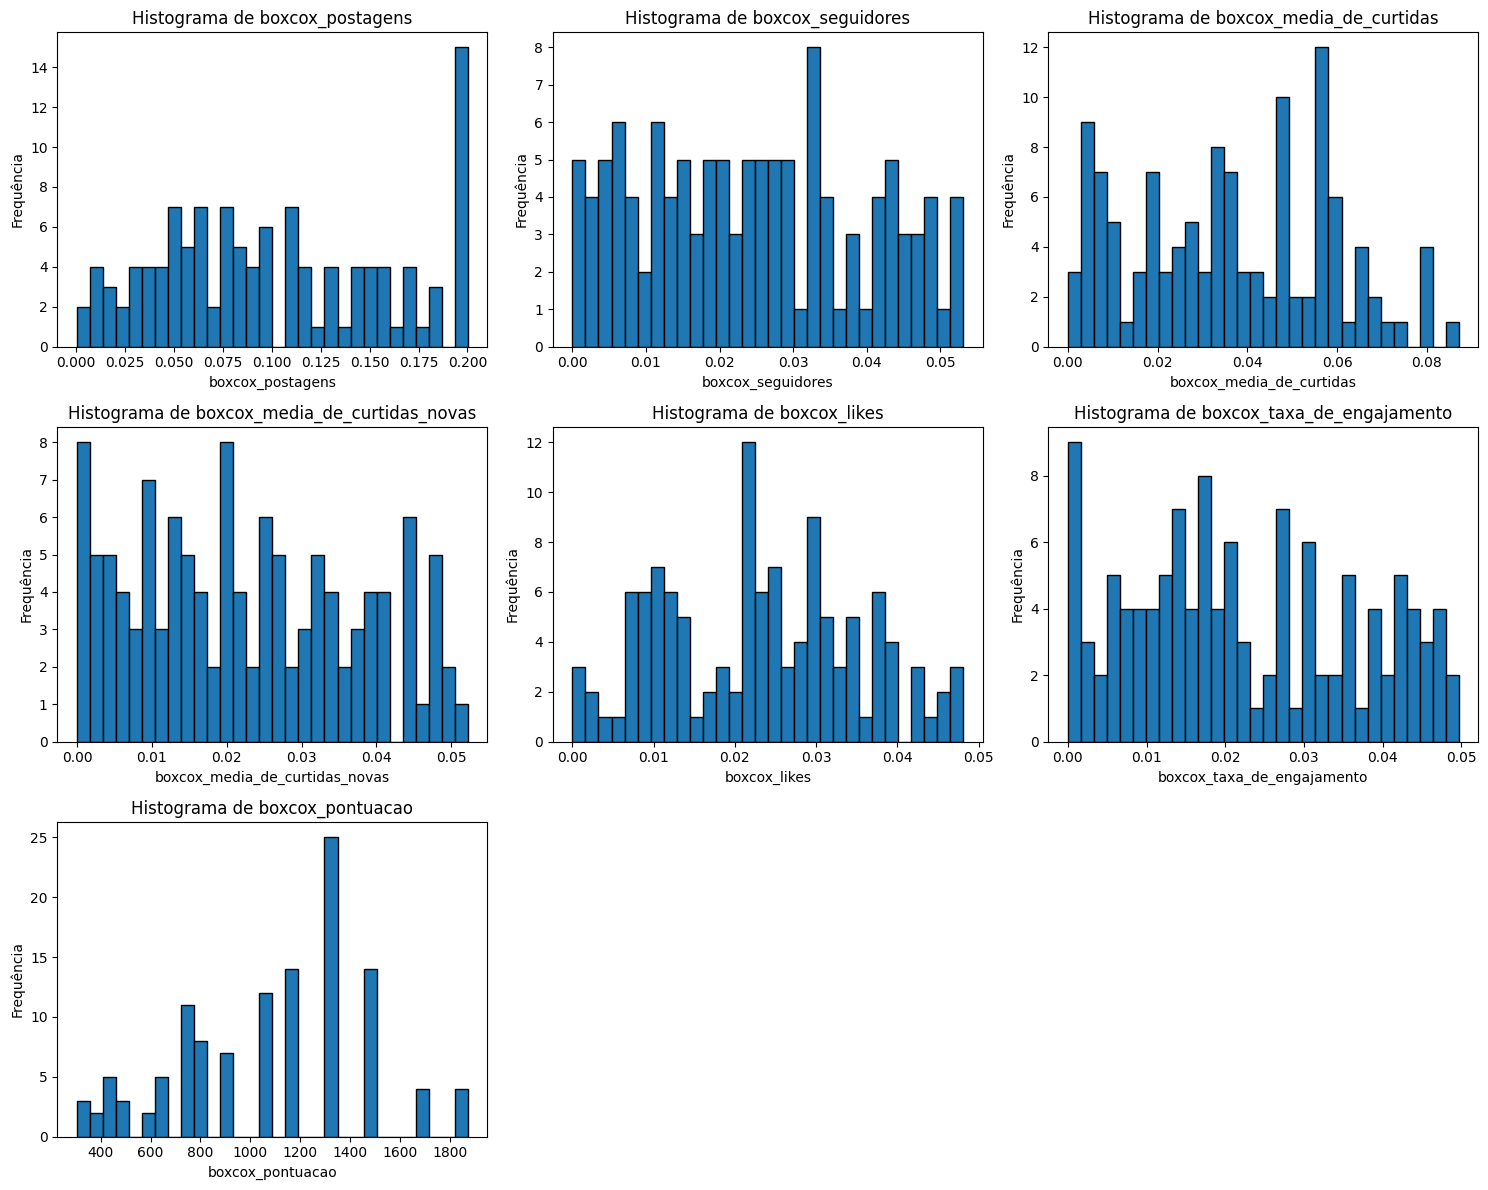

In [ ]:
# vamo plotar de novo os histogramas pra analisar o impacto da transformação

variaveis_out = ['boxcox_postagens', 'boxcox_seguidores', 'boxcox_media_de_curtidas', 'boxcox_media_de_curtidas_novas', 'boxcox_likes', 'boxcox_taxa_de_engajamento', 'boxcox_pontuacao']  #-> a lista que a gente vai plotar

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_out, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var}')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()

- essa deu uma mexida nas distribuições, vamo fazer um teste de Shapiro-Wilk pra verificar a normalidade dessas distribuições

In [ ]:
from scipy.stats import shapiro

variaveis = ['boxcox_postagens', 'boxcox_seguidores', 'boxcox_media_de_curtidas', 'boxcox_media_de_curtidas_novas', 'boxcox_likes', 'boxcox_taxa_de_engajamento', 'boxcox_pontuacao']

for variavel in variaveis:
    stat, p_value = shapiro (df_insta [variavel].dropna())
    print (f'Variável: {variavel}')
    print (f'Estatística W: {stat:.4f}')
    print (f'Valor-p: {p_value:.4f}')

Variável: boxcox_postagens
Estatística W: 0.9463
Valor-p: 0.0001
Variável: boxcox_seguidores
Estatística W: 0.9590
Valor-p: 0.0011
Variável: boxcox_media_de_curtidas
Estatística W: 0.9656
Valor-p: 0.0039
Variável: boxcox_media_de_curtidas_novas
Estatística W: 0.9545
Valor-p: 0.0005
Variável: boxcox_likes
Estatística W: 0.9773
Valor-p: 0.0411
Variável: boxcox_taxa_de_engajamento
Estatística W: 0.9510
Valor-p: 0.0003
Variável: boxcox_pontuacao
Estatística W: 0.9656
Valor-p: 0.0039


- os valores-p foram todos menores que 0.05 (oq sugere que a distribuição não é normal), mas as estatísticas W foram próximas de 1 (oq sugere uma distribuição normal)
- isso pode sugerir que, embora haja um desvio da normalidade, ele pode não ser preocupante
- os valores obtidos com a boxcox são levemente melhores, então vamo seguir com ela

In [ ]:
df_insta ['país'].unique()  #-> vamo ver todas as categorias que tem na coluna 'país'

array(['United Kingdom', 'United States', 'India', 'Brazil', 'Turkey',
       'France', 'Indonesia', 'Colombia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', 'Spain', 'Anguilla', 'Switzerland', 'Sweden',
       'British Virgin Islands', 'Germany'], dtype=object)

- como a gente tem muitas categorias nessa coluna, fazer um Encoding seria dispendioso demais (e sem nenhuma garantia de que a variável é realmente relevante pro modelo), então vamo fazer uma análise de variância (ANOVA) pra verificar se ela contribui significativamente pro modelo.
- pra isso, a gente vai preparar os dados criando um modelo de regressão linear onde a variável categórica é a variável independente.
- no nosso modelo, a variável alvo é a 'taxa de engajamento'

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as ols

modelo_anova = ols.ols ('taxa_de_engajamento ~ C (país)', data = df_insta).fit()
anova_tabela = sm.stats.anova_lm (modelo_anova, typ = 2)
print (anova_tabela)

            sum_sq     df         F    PR(>F)
C(país)   0.021191   16.0  1.456674  0.131135
Residual  0.092739  102.0       NaN       NaN


- o PR(>F) nos diz o valor de significância.
- nesse caso, a gente encontrou um valor alto (sabendo que o comum nível de significância é 0.05). isso quer dizer que a variável 'pais' não contribui significativamente pra explicar a variabilidade na nossa variável alvo (que é taxa_de_dengajamento).
- como 'país' não é uma variável relevante pro nosso modelo, não vale a pena fazer nenhuma tratativa nessa variável categórica. então vamo só seguir sem ela

In [ ]:
df_insta.columns

Index(['postagens', 'seguidores', 'media_de_curtidas',
       'media_de_curtidas_novas', 'likes', 'taxa_de_engajamento', 'país',
       'influenciador', 'pontuacao', 'log_postagens', 'log_seguidores',
       'log_media_de_curtidas', 'log_media_de_curtidas_novas', 'log_likes',
       'log_taxa_de_engajamento', 'boxcox_postagens', 'boxcox_seguidores',
       'boxcox_media_de_curtidas', 'boxcox_media_de_curtidas_novas',
       'boxcox_likes', 'boxcox_pontuacao', 'boxcox_taxa_de_engajamento'],
      dtype='object')

In [ ]:
# vamo manter no df_insta só as variáveis transformadas com boxcox

variaveis_boxcox = ['boxcox_postagens', 'boxcox_seguidores', 'boxcox_media_de_curtidas', 'boxcox_media_de_curtidas_novas', 'boxcox_likes', 'boxcox_pontuacao', 'boxcox_taxa_de_engajamento']
df_insta = df_insta [variaveis_boxcox].copy()
df_insta.columns

Index(['boxcox_postagens', 'boxcox_seguidores', 'boxcox_media_de_curtidas',
       'boxcox_media_de_curtidas_novas', 'boxcox_likes', 'boxcox_pontuacao',
       'boxcox_taxa_de_engajamento'],
      dtype='object')

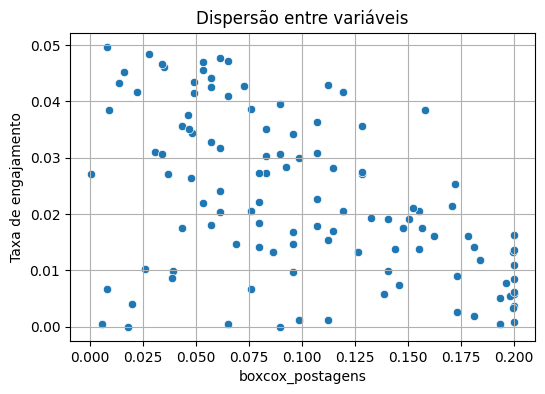

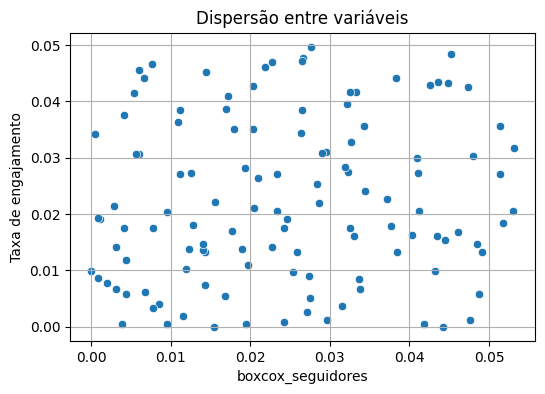

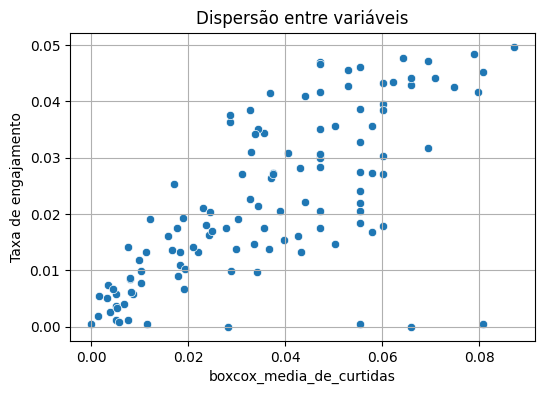

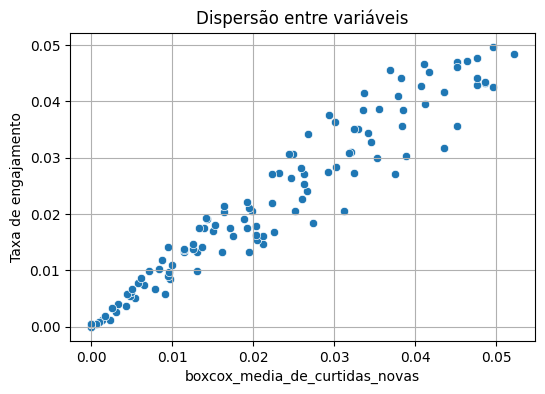

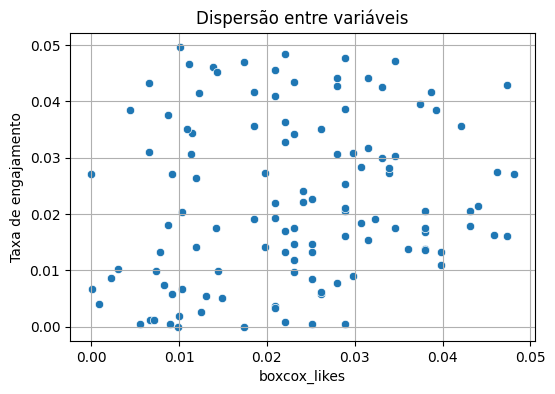

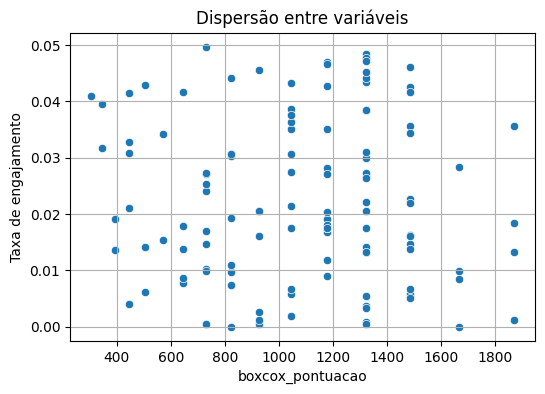

In [ ]:
# vamo verificar a linearidade da relação entre as variáveis explicativas e a variável alvo através de gráficos de dispersão

variaveis_independentes = df_insta.drop (columns = ['boxcox_taxa_de_engajamento'])
for variavel in variaveis_independentes:
  plt.figure (figsize = (6, 4))
  sns.scatterplot (x = df_insta [variavel], y = df_insta ['boxcox_taxa_de_engajamento'])
  plt.title (f'Dispersão entre variáveis')
  plt.xlabel (variavel)
  plt.ylabel ('Taxa de engajamento')
  plt.grid (True)
  plt.show()

In [ ]:
# vamo separar as variáveis e dividir os dados em treino e teste

from sklearn.model_selection import train_test_split

X = df_insta.drop (['boxcox_taxa_de_engajamento'], axis = 1)  #-> aqi a gente exclui a variável alvo
Y = df_insta ['boxcox_taxa_de_engajamento']  #-> variável-alvo
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.2, random_state = 42)

# depois vamo criar e testar o modelo:

modelo = LinearRegression()
modelo.fit (X_treino, Y_treino)

LinearRegression()

In [ ]:
# agora vamo fazer as previsões nos dados de teste

y_pred = modelo.predict (X_teste)

# e pra avaliar o desempenho do modelo, vamo calcular as métricas

mse = mean_squared_error (Y_teste, y_pred)
rmse = np.sqrt (mean_squared_error (Y_teste, y_pred))
mae = mean_absolute_error (Y_teste, y_pred)
r2 = r2_score (Y_teste, y_pred)

print (f"Erro médio quadrático (MSE): {mse :.2f}")
print (f"Erro médio quadrático (RMSE): {rmse :.2f}")
print (f"Erro médio absoluto (MAE): {mae :.2f}")
print (f"Coeficiente de determinação (R2): {r2 :.2f}")

Erro médio quadrático (MSE): 0.00
Erro médio quadrático (RMSE): 0.00
Erro médio absoluto (MAE): 0.00
Coeficiente de determinação (R2): 0.98


In [ ]:
# inicialmente, vamo rodar as métricas pro conjunto de teste e comparar com o conjunto de treino pra avaliar um possível overfitting

y_pred_treino = modelo.predict (X_treino)
y_pred_teste = modelo.predict (X_teste)

# conjunto de treino
mse_treino = mean_squared_error (Y_treino, y_pred_treino)
rmse_treino = np.sqrt (mse_treino)
mae_treino = mean_absolute_error (Y_treino, y_pred_treino)
r2_treino = r2_score (Y_treino, y_pred_treino)

# conjunto de teste
mse_teste = mean_squared_error (Y_teste, y_pred_teste)
rmse_teste = np.sqrt (mse_teste)
mae_teste = mean_absolute_error (Y_teste, y_pred_teste)
r2_teste = r2_score (Y_teste, y_pred_teste)

print (f"MSE de treino: {mse_treino :.2f} e MSE de teste: {mse_teste :.2f}")
print (f"RMSE de treino: {rmse_treino :.2f} e RMSE de teste: {rmse_teste :.2f}")
print (f"MAE de treino: {mae_treino :.2f} e MAE de teste: {mae_teste :.2f}")
print (f"R2 de treino: {r2_treino :.2f} e R2 de teste: {r2_teste :.2f}")

MSE de treino: 0.00 e MSE de teste: 0.00
RMSE de treino: 0.00 e RMSE de teste: 0.00
MAE de treino: 0.00 e MAE de teste: 0.00
R2 de treino: 0.99 e R2 de teste: 0.98


- os desempenhos nos conjuntos de treino e teste tão bem semelhantes, o que pode indicar que não tá ocorrendo overfitting.
- vamo plotar um gráfico pra garantir isso de outra forma

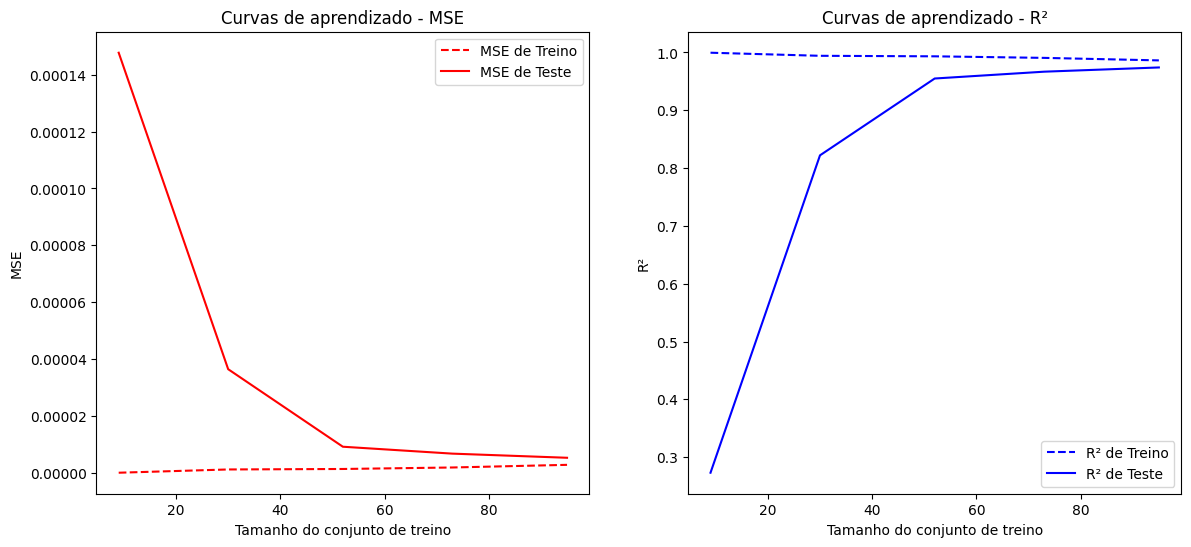

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

neg_mse_scorer = make_scorer (mean_squared_error, greater_is_better = False)
r2_scorer = make_scorer (r2_score)

train_sizes, train_mse_scores, test_mse_scores = learning_curve (modelo, X, Y, cv = 5, scoring = neg_mse_scorer)

train_mse_scores_mean = -np.mean (train_mse_scores, axis = 1)
test_mse_scores_mean = -np.mean (test_mse_scores, axis = 1)

train_sizes, train_r2_scores, test_r2_scores = learning_curve (modelo, X, Y, cv = 5, scoring = r2_scorer)

train_r2_scores_mean = np.mean (train_r2_scores, axis = 1)
test_r2_scores_mean = np.mean (test_r2_scores, axis = 1)

fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (14, 6))  #-> vamo configurar pros gráficos ficarem lado a lado

ax1.plot (train_sizes, train_mse_scores_mean, label = 'MSE de Treino', color = 'red', linestyle = '--')
ax1.plot (train_sizes, test_mse_scores_mean, label = 'MSE de Teste', color = 'red')
ax1.set_xlabel ('Tamanho do conjunto de treino')
ax1.set_ylabel ('MSE')
ax1.set_title ("Curvas de aprendizado - MSE")
ax1.legend(loc = "best")

ax2.plot (train_sizes, train_r2_scores_mean, label = 'R² de Treino', color = 'blue', linestyle = '--')
ax2.plot (train_sizes, test_r2_scores_mean, label = 'R² de Teste', color = 'blue')
ax2.set_xlabel ('Tamanho do conjunto de treino')
ax2.set_ylabel ('R²')
ax2.set_title ("Curvas de aprendizado - R²")
ax2.legend(loc = "best")

plt.tight_layout
plt.show()

- a diferença no desempenho de treino e teste mostra que tem sinais de overfitting

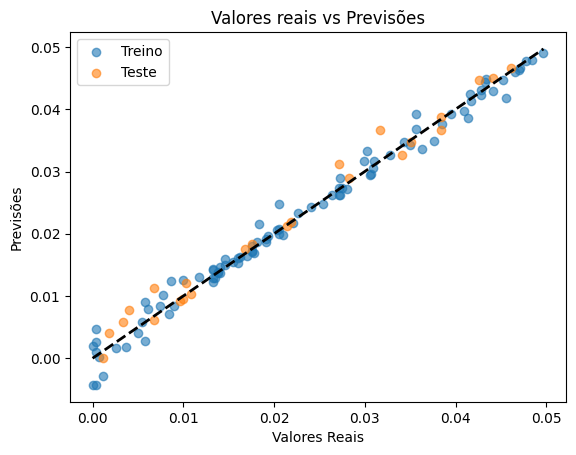

In [ ]:
plt.scatter (Y_treino, y_pred_treino, label = 'Treino', alpha = 0.6)
plt.scatter (Y_teste, y_pred_teste, label = 'Teste', alpha = 0.6)
plt.plot ([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 2)
plt.xlabel ("Valores Reais")
plt.ylabel ("Previsões")
plt.legend()
plt.title  ("Valores reais vs Previsões")
plt.show()

- a maioria dos pontos segue bem a linha diagonal, o que indica que os valores previstos pelo modelo tão próximos dos valores reais, sugerindo um bom desempenho, no geral
- os pontos de teste apresentam uma dispersão um pouquinho maior em relação aos pontos de treino, sugerindo que o modelo performa melhor no conjunto de treino (mas essa dispersão não é tão grande)
- nos extremos, parece que esse padrão de dispersão é um pouco maior, o que pode sugerir que alguns ajustes no modelo são necessários

In [ ]:
# vamo fazer uma análise dos coeficientes do modelo pra gente entender melhor a relação entre as variáveis

X = sm.add_constant(X)  #-> vamo add uma constante pra interceptação
modelo = sm.OLS(Y, X).fit()  #-> vamo ajustar o modelo

print (modelo.summary())

                                OLS Regression Results                                
Dep. Variable:     boxcox_taxa_de_engajamento   R-squared:                       0.985
Model:                                    OLS   Adj. R-squared:                  0.984
Method:                         Least Squares   F-statistic:                     1244.
Date:                        Sun, 17 Nov 2024   Prob (F-statistic):          5.22e-100
Time:                                16:02:01   Log-Likelihood:                 587.02
No. Observations:                         119   AIC:                            -1160.
Df Residuals:                             112   BIC:                            -1141.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

- Durbin-Watson é usada pra verificar a presença de autocorrelação nos resíduos. o valor que a gente encontrou tá próximo de 2, que é o valor ideal, e indica que não há autocorrelação entre os resíduos.
- a gente encontrou um F-statistic bem alto (200), o que indica que, pelo menos, uma das variáveis independentes contribuem significativamente pra prever a variável alvo
- intervalos de confiança estreitos indicam  estimativas mais precisas. além disso, os que incluem o zero, podem indicar que a variável pode não ser estatísticamente significativa. Nesse modelo, é o caso de 'media_de_curtidas', 'likes' e 'pontuacao'
- de forma semelhante ao que a gente já observou com os intervalos de segurança, de acordo com o valor p das variáveis, a gente encontrou um valor acima de 0.05 nas variáveis 'media_de_curtidas', 'likes' e 'pontuacao' (beeeem no limite), o que sugere que elas podem não ser significativas pro modelo
- convém analisar e remover variáveis não significativos

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score

X, Y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
modelo = LinearRegression()
scores = cross_val_score (modelo, X, Y, cv = 10, scoring = 'r2')   #-> vamo usar 10 folds e usar o R² como métrica

print("Scores de R² para cada fold:", scores)
print("R² médio:", np.mean(scores))
print("Desvio padrão do R²:", np.std(scores))

Scores de R² para cada fold: [0.99999934 0.99999935 0.99999917 0.99999856 0.9999999  0.99999945
 0.9999994  0.99999791 0.9999995  0.9999988 ]
R² médio: 0.9999991386140404
Desvio padrão do R²: 5.390584098771718e-07


- os valores de R² aparece constantemente alto em todos os folds e o desvio padrão é extremamente baixo

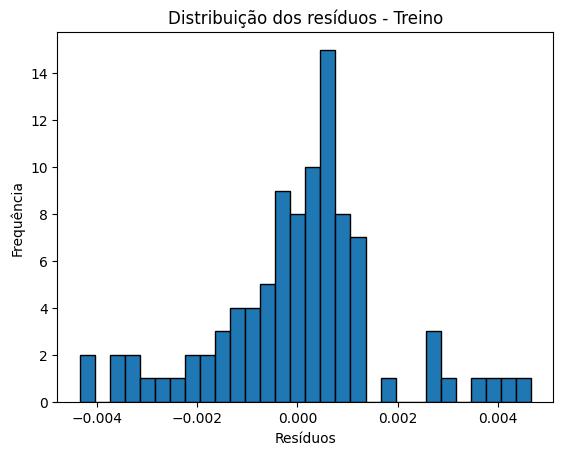

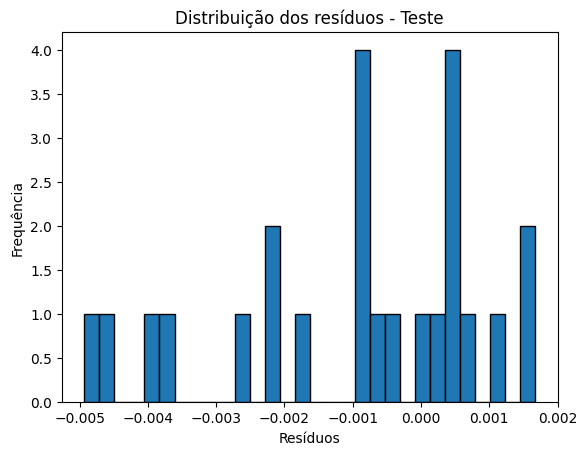

In [ ]:
# vamo gerar gráficos de resíduos pra gente verificar se há padrões neles (o que pode sugerir problema de heterocedasticidade)
residuos_teste = Y_teste - y_pred_teste
residuos_treino = Y_treino - y_pred_treino

# vamo começar por um histograma

plt.hist (residuos_treino, bins = 30, edgecolor = 'black')
plt.xlabel ('Resíduos')
plt.ylabel ('Frequência')
plt.title ('Distribuição dos resíduos - Treino')
plt.show()

plt.hist (residuos_teste, bins = 30, edgecolor = 'black')
plt.xlabel ('Resíduos')
plt.ylabel ('Frequência')
plt.title ('Distribuição dos resíduos - Teste')
plt.show()

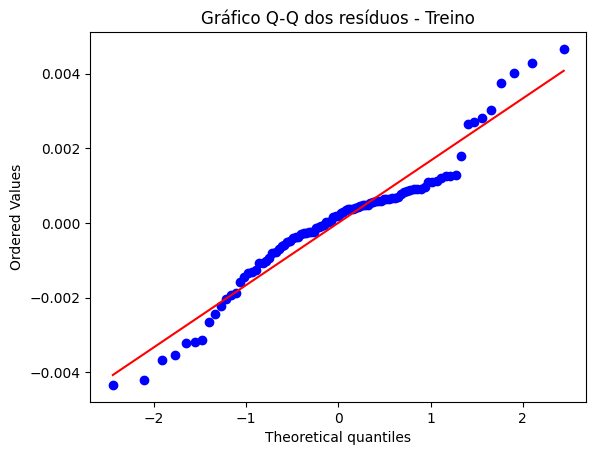

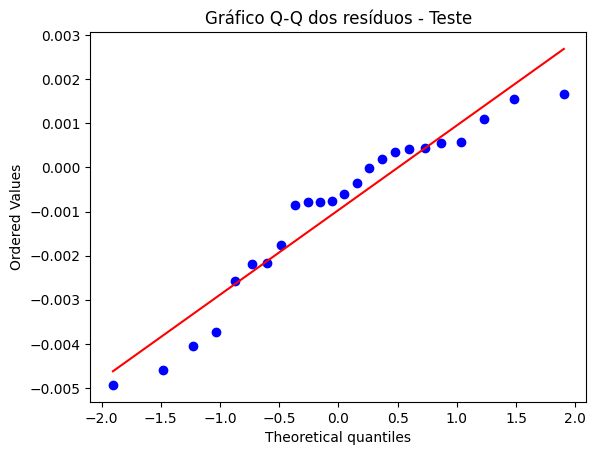

In [ ]:
# vamo gerar tbm um gráfico Q-Q dos resíduos

import scipy.stats as stats

stats.probplot (residuos_treino, dist = "norm", plot = plt)
plt.title ("Gráfico Q-Q dos resíduos - Treino")
plt.show()

stats.probplot (residuos_teste, dist = "norm", plot = plt)
plt.title ("Gráfico Q-Q dos resíduos - Teste")
plt.show()

- os pontos seguem, relativamente, perto da linha vermelha, indicando que os resíduos podem tá normalmente distribuídos de uma forma geral, mas com índicios de desvio da normalidade nos extremos
- esses desvios nas extremidades podem indicar, ainda, a presença de outliers ou de algum grau de anormalidade na distribuição dos resíduos

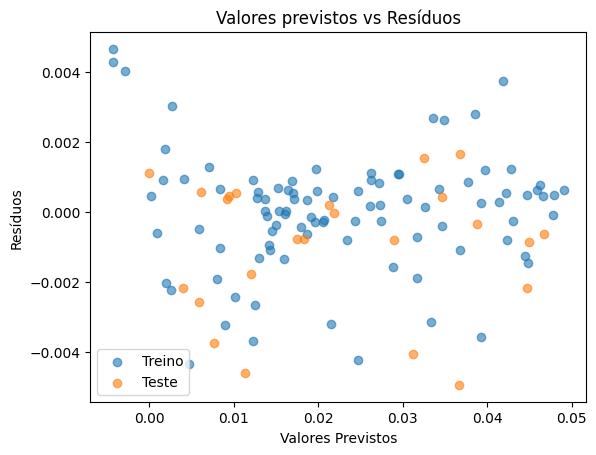

In [ ]:
# agora vamo fzr um gráfico de dispersão de resíduos vs valores previstos

plt.scatter (y_pred_treino, residuos_treino, label = 'Treino', alpha = 0.6)
plt.scatter (y_pred_teste, residuos_teste, label = 'Teste', alpha = 0.6)
plt.xlabel ("Valores Previstos")
plt.ylabel ("Resíduos")
plt.legend()
plt.title  ("Valores previstos vs Resíduos")
plt.show()

- não encontramos, por esse gráfico, indícios claros de heterocedasticidade. vamo confirmar pelo teste de Breusch-Pagan

In [ ]:
# vamo confirmar a heterocedasticidade com o teste de Breusch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X = sm.add_constant (X)  #-> aqi a gente add a constante
modelo = sm.OLS (Y, X).fit()  #-> cria e treina o modelo inicial
teste_bp = het_breuschpagan (modelo.resid, modelo.model.exog)  #-> faz o teste

print ("Estatística do teste:", teste_bp [0])
print ("P-valor:", teste_bp [1])
print ("F-statistic:", teste_bp [2])
print ("P-valor F-statistic:", teste_bp [3])

Estatística do teste: 6.573699686047507
P-valor: 0.2543232320920618
F-statistic: 1.3228133157621846
P-valor F-statistic: 0.2611964969614853


- o p-valor que a gente encontrou foi bem maior que o nível comum, que é 0.05. sendo assim, não encontramos evidências significativas de heterocedasticidade

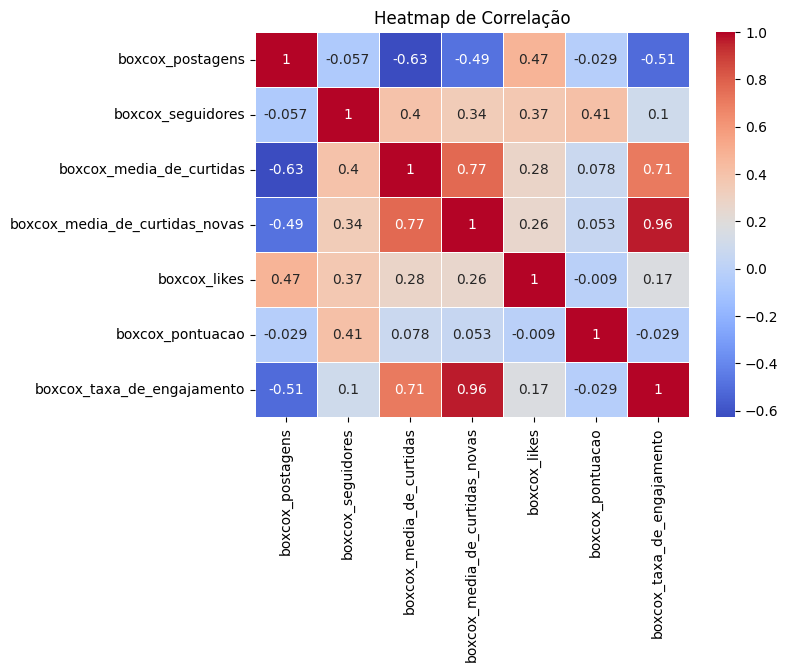

In [ ]:
# vamo fazer um heatmap pra ver a correlação entre as variáveis

matriz_correlação = df_insta.corr()
plt.figure (figsize = (7, 5))
sns.heatmap (matriz_correlação, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title ('Heatmap de Correlação')
plt.show()

a partir dessa matriz, a gente pode refletir sobre alguns pontos importantes:
- a variável 'pontuacao' tem uma correlação próxima de zero com a variável alvo. sendo assim, ela pode acabar adicionando ruído ao modelo, aumentando a complexidade sem ser realmente útil;
- 'seguidores' e 'likes' têm baixa correlação com a variável alvo sozinhas, mas a gente pode testar alguma interação entre elas e analisar o impacto disso;
- 'postagens' mostra uma correlação moderada em relação à variavel alvo;
- 'media_de_curtidas' tem uma correlação moderada/alta com a variável alvo;
- 'media_de_curtidas_novas' tem uma correlação fortíssima com a variável alvo, o que significa que ela pode ser muito relevante pro modelo, mas vamo calcular o VIF pra avaliar multicolinearidade


In [ ]:
# vamo verificar a multicolinearidade com o VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

variaveis_independentes = df_insta.drop (columns = ['boxcox_taxa_de_engajamento'])  #-> exclui a variável-alvo
variaveis_independentes = sm.add_constant (variaveis_independentes)  #-> add uma constante pra interceptação
vif = pd.DataFrame()  #-> cria um DataFrame com as informações

vif ["Variável"] = variaveis_independentes.columns
vif ["VIF"] = [variance_inflation_factor (variaveis_independentes.values, i) for i in range (variaveis_independentes.shape [1])]
print (vif)

                         Variável        VIF
0                           const  33.161672
1                boxcox_postagens   6.846987
2               boxcox_seguidores   1.624727
3        boxcox_media_de_curtidas   6.436418
4  boxcox_media_de_curtidas_novas   2.529130
5                    boxcox_likes   4.669829
6                boxcox_pontuacao   1.269531


- um VIF entre 1 e 5 sugere uma correlação moderada, não sendo problemática. se o valor for maior que 5, já começa a ser preocupante
- é o caso de 'postagens' e 'media_de_curtidas', então vamo testar combinar variáveis pra ver se isso melhora

In [ ]:
# vamo testar uma interação entre 'postagens' e 'likes' pra analisar o impacto disso
df_insta ['propor_likes_post'] = df_insta ['boxcox_likes'] / df_insta ['boxcox_postagens']

# vamo testar outra interação entre 'seguidores' e 'likes' tbm
df_insta ['propor_seg_likes'] = df_insta ['boxcox_seguidores'] / df_insta ['boxcox_likes']

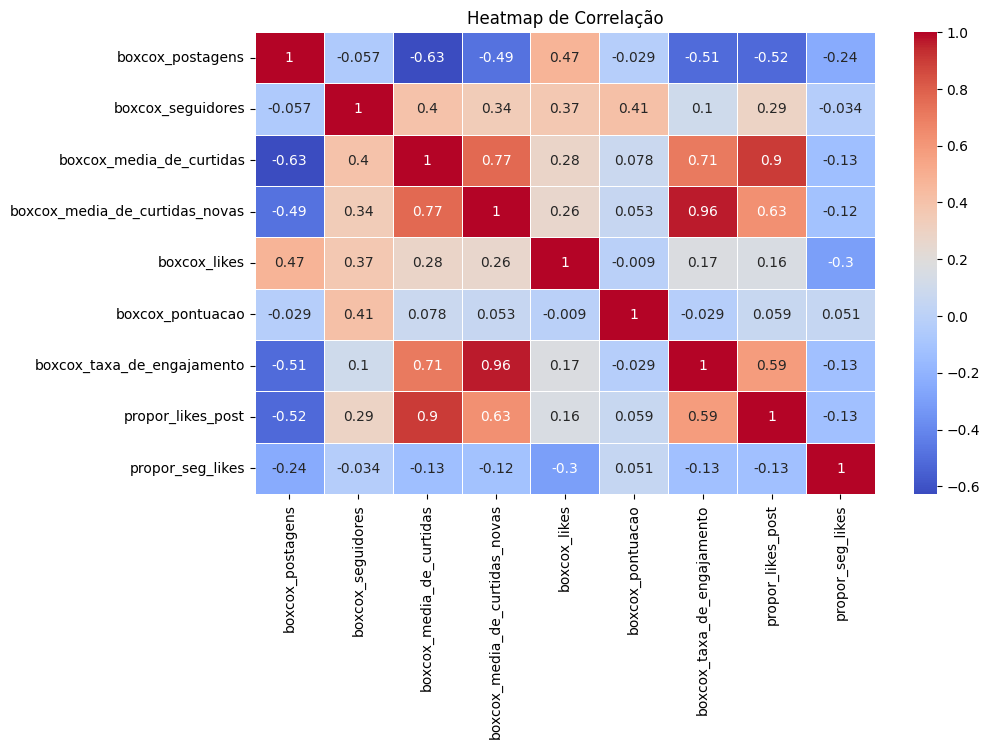

In [ ]:
# vamo fazer um heatmap pra ver a correlação entre as variáveis

matriz_correlação = df_insta.corr()
plt.figure (figsize = (10, 6))
sns.heatmap (matriz_correlação, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title ('Heatmap de Correlação')
plt.show()

In [ ]:
df_insta.columns

Index(['boxcox_postagens', 'boxcox_seguidores', 'boxcox_media_de_curtidas',
       'boxcox_media_de_curtidas_novas', 'boxcox_likes', 'boxcox_pontuacao',
       'boxcox_taxa_de_engajamento', 'propor_likes_post', 'propor_seg_likes'],
      dtype='object')

In [ ]:
# vamo tratar possíveis valores infinitos ou NaNs nas variáveis novas
novas_variaveis = ['propor_likes_post', 'propor_seg_likes']
for variavel in novas_variaveis:
    if df_insta [variavel].isnull().any() or np.isinf (df_insta [variavel]).any():
        print (f"Variável {variavel} contém valores não finitos ou NaN.")

Variável propor_seg_likes contém valores não finitos ou NaN.


In [ ]:
df_insta [novas_variaveis] = df_insta [novas_variaveis].replace ([np.inf, -np.inf], np.nan).dropna()  #-> vamo remover os valores não finitos

In [ ]:
# vamo normalizar os dados pra manter as variáveis numéricas escaladas

colunas_pra_normalizar = ['propor_likes_post', 'propor_seg_likes']
scaler = MinMaxScaler ()
df_insta [colunas_pra_normalizar] = scaler.fit_transform (df_insta [colunas_pra_normalizar])

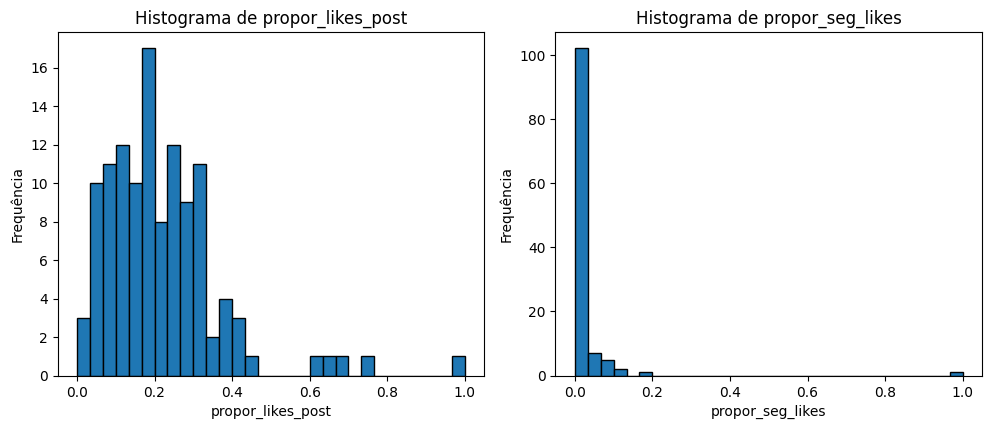

In [ ]:
# vamo plotar de novo os histogramas pra ver a distribuição das variáveis novas

variaveis_novas = ['propor_likes_post', 'propor_seg_likes']  #-> a lista que a gente vai plotar

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_novas, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var}')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()

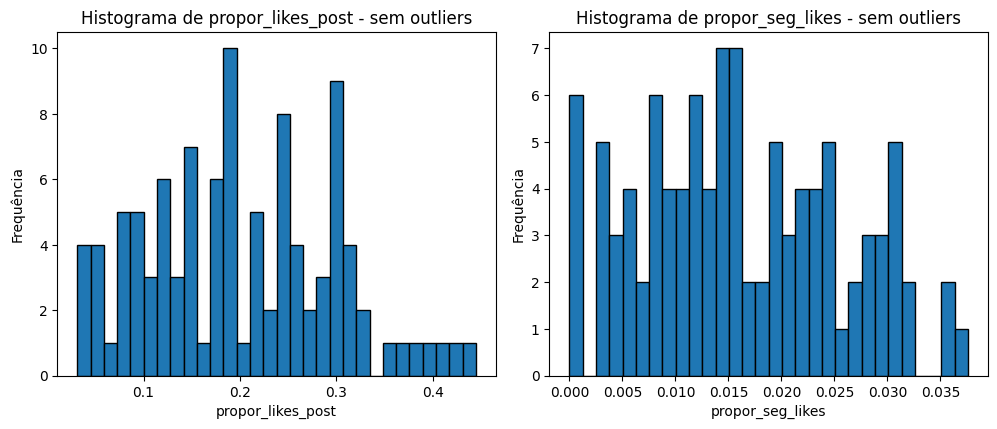

In [ ]:
# vamo tratar esses outliers pelo IQR

colunas = ['propor_likes_post', 'propor_seg_likes']
for coluna in colunas:
  Q1 = df_insta [coluna].quantile (0.25)
  Q3 = df_insta [coluna]. quantile (0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR  #-> aqui a gente delimita o que consideramos outlier
  limite_superior = Q3 + 1.5 * IQR
  df_insta = df_insta [(df_insta [coluna] >= limite_inferior) & (df_insta [coluna] <= limite_superior)]

  variaveis_outliers = ['propor_likes_post', 'propor_seg_likes']  #-> a lista das variáveis que a gente vai plotar os histogramas

plt.figure (figsize = (15, 12))
for i, var in enumerate (variaveis_outliers, 1):
  plt.subplot (3, 3, i)
  plt.hist (df_insta [var], bins = 30, edgecolor = 'black')
  plt.title (f'Histograma de {var} - sem outliers')
  plt.xlabel (var)
  plt.ylabel ('Frequência')

plt.tight_layout()
plt.show()  #-> vamo conferir se os outliers foram removidos

In [ ]:
from scipy.stats import shapiro

variaveis = ['propor_likes_post', 'propor_seg_likes']

for variavel in variaveis:
    stat, p_value = shapiro (df_insta [variavel].dropna())
    print (f'Variável: {variavel}')
    print (f'Estatística W: {stat:.4f}')
    print (f'Valor-p: {p_value:.4f}')

Variável: propor_likes_post
Estatística W: 0.9773
Valor-p: 0.0754
Variável: propor_seg_likes
Estatística W: 0.9725
Valor-p: 0.0315


- o valor-p de 'propor_seg_likes' foi menor que 0.05 e a estatísticas W foi próxima de 1, oq sugere uma distribuição normal
- o valor-p de 'propor_likes_post' foi um pouco maior que 0.05 (que sugere uma distribuição não normal), mas a estatísticas W foi próxima de 1 (oq sugere uma distribuição normal)


In [ ]:
# vamo verificar a multicolinearidade com o VIF com as novas variáveis

variaveis_independentes = df_insta.drop (columns = ['boxcox_taxa_de_engajamento'])  #-> exclui a variável-alvo
variaveis_independentes = sm.add_constant (variaveis_independentes)  #-> add uma constante pra interceptação
vif = pd.DataFrame()  #-> cria um DataFrame com as informações

vif ["Variável"] = variaveis_independentes.columns
vif ["VIF"] = [variance_inflation_factor (variaveis_independentes.values, i) for i in range (variaveis_independentes.shape [1])]
print (vif)

                         Variável         VIF
0                           const  100.318220
1                boxcox_postagens   20.285498
2               boxcox_seguidores    8.936177
3        boxcox_media_de_curtidas   99.940710
4  boxcox_media_de_curtidas_novas    3.137080
5                    boxcox_likes   15.151699
6                boxcox_pontuacao    1.258238
7               propor_likes_post   47.195262
8                propor_seg_likes    7.146426


In [ ]:
# vamo verificar a multicolinearidade com o VIF com as novas variáveis

variaveis_independentes = df_insta.drop (columns = ['boxcox_taxa_de_engajamento', 'boxcox_media_de_curtidas', 'boxcox_likes'])  #-> exclui a variável-alvo
variaveis_independentes = sm.add_constant (variaveis_independentes)  #-> add uma constante pra interceptação
vif = pd.DataFrame()  #-> cria um DataFrame com as informações

vif ["Variável"] = variaveis_independentes.columns
vif ["VIF"] = [variance_inflation_factor (variaveis_independentes.values, i) for i in range (variaveis_independentes.shape [1])]
print (vif)

                         Variável        VIF
0                           const  63.690712
1                boxcox_postagens   3.512903
2               boxcox_seguidores   5.040735
3  boxcox_media_de_curtidas_novas   3.115863
4                boxcox_pontuacao   1.256889
5               propor_likes_post   5.868451
6                propor_seg_likes   3.769391


In [ ]:
# vamo treinar o modelo de novo e analisar as métricas obtidas
# vamo separar as variáveis e dividir os dados em treino e teste

from sklearn.model_selection import train_test_split

X = df_insta.drop (['boxcox_taxa_de_engajamento'], axis = 1)  #-> aqi a gente exclui a variável alvo
Y = df_insta ['boxcox_taxa_de_engajamento']  #-> variável-alvo
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.2, random_state = 42)

# depois vamo criar e testar o modelo:

modelo = LinearRegression()
modelo.fit (X_treino, Y_treino)

LinearRegression()

In [ ]:
# agora vamo fazer as previsões nos dados de teste

y_pred = modelo.predict (X_teste)

# e pra avaliar o desempenho do modelo, vamo calcular as métricas

mse = mean_squared_error (Y_teste, y_pred)
rmse = np.sqrt (mean_squared_error (Y_teste, y_pred))
mae = mean_absolute_error (Y_teste, y_pred)
r2 = r2_score (Y_teste, y_pred)

print (f"Erro médio quadrático (MSE): {mse :.2f}")
print (f"Erro médio quadrático (RMSE): {rmse :.2f}")
print (f"Erro médio absoluto (MAE): {mae :.2f}")
print (f"Coeficiente de determinação (R2): {r2 :.2f}")

Erro médio quadrático (MSE): 0.00
Erro médio quadrático (RMSE): 0.00
Erro médio absoluto (MAE): 0.00
Coeficiente de determinação (R2): 0.99


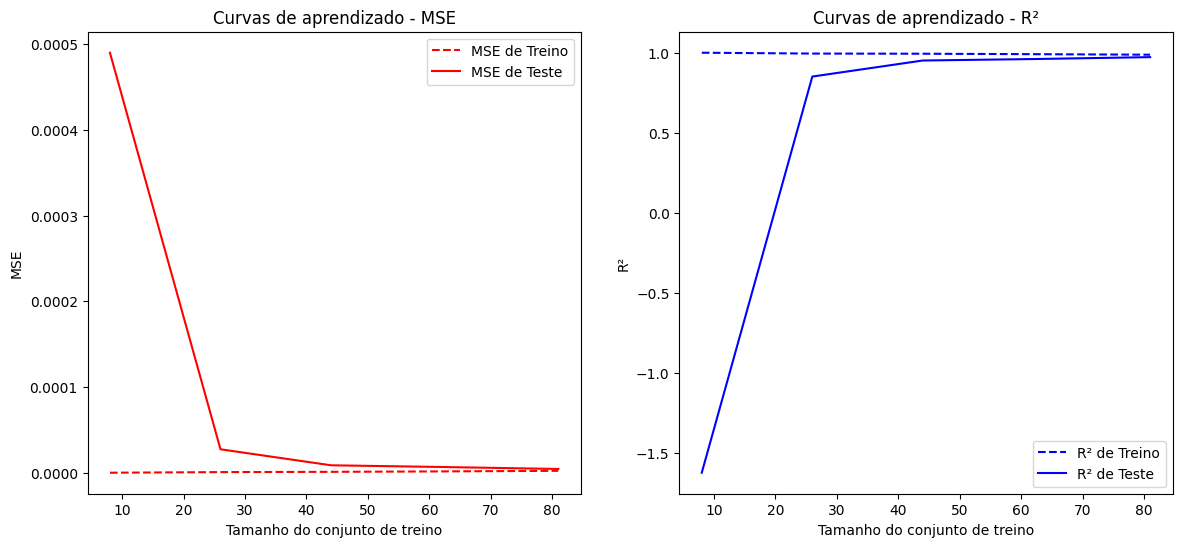

In [ ]:
neg_mse_scorer = make_scorer (mean_squared_error, greater_is_better = False)
r2_scorer = make_scorer (r2_score)

train_sizes, train_mse_scores, test_mse_scores = learning_curve (modelo, X, Y, cv = 5, scoring = neg_mse_scorer)

train_mse_scores_mean = -np.mean (train_mse_scores, axis = 1)
test_mse_scores_mean = -np.mean (test_mse_scores, axis = 1)

train_sizes, train_r2_scores, test_r2_scores = learning_curve (modelo, X, Y, cv = 5, scoring = r2_scorer)

train_r2_scores_mean = np.mean (train_r2_scores, axis = 1)
test_r2_scores_mean = np.mean (test_r2_scores, axis = 1)

fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (14, 6))  #-> vamo configurar pros gráficos ficarem lado a lado

ax1.plot (train_sizes, train_mse_scores_mean, label = 'MSE de Treino', color = 'red', linestyle = '--')
ax1.plot (train_sizes, test_mse_scores_mean, label = 'MSE de Teste', color = 'red')
ax1.set_xlabel ('Tamanho do conjunto de treino')
ax1.set_ylabel ('MSE')
ax1.set_title ("Curvas de aprendizado - MSE")
ax1.legend(loc = "best")

ax2.plot (train_sizes, train_r2_scores_mean, label = 'R² de Treino', color = 'blue', linestyle = '--')
ax2.plot (train_sizes, test_r2_scores_mean, label = 'R² de Teste', color = 'blue')
ax2.set_xlabel ('Tamanho do conjunto de treino')
ax2.set_ylabel ('R²')
ax2.set_title ("Curvas de aprendizado - R²")
ax2.legend(loc = "best")

plt.tight_layout
plt.show()

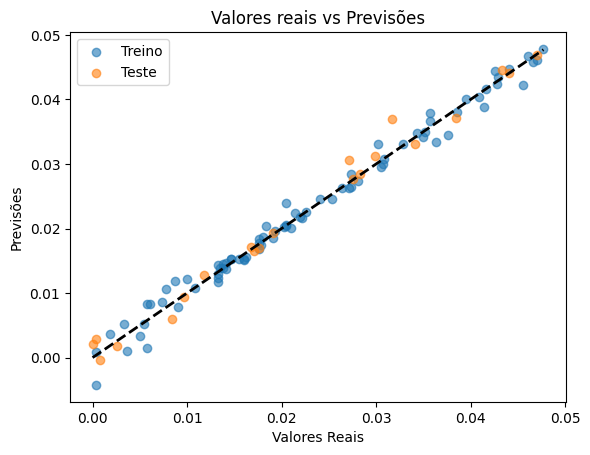

In [ ]:
y_pred_treino = modelo.predict (X_treino)
y_pred_teste = modelo.predict (X_teste)

plt.scatter (Y_treino, y_pred_treino, label = 'Treino', alpha = 0.6)
plt.scatter (Y_teste, y_pred_teste, label = 'Teste', alpha = 0.6)
plt.plot ([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 2)
plt.xlabel ("Valores Reais")
plt.ylabel ("Previsões")
plt.legend()
plt.title  ("Valores reais vs Previsões")
plt.show()

In [ ]:
# vamo fazer uma análise dos coeficientes do modelo pra gente entender melhor a relação entre as variáveis

X = sm.add_constant(X)  #-> vamo add uma constante pra interceptação
modelo = sm.OLS(Y, X).fit()  #-> vamo ajustar o modelo

print (modelo.summary())

                                OLS Regression Results                                
Dep. Variable:     boxcox_taxa_de_engajamento   R-squared:                       0.987
Model:                                    OLS   Adj. R-squared:                  0.986
Method:                         Least Squares   F-statistic:                     861.2
Date:                        Sun, 17 Nov 2024   Prob (F-statistic):           1.12e-83
Time:                                16:02:11   Log-Likelihood:                 515.31
No. Observations:                         102   AIC:                            -1013.
Df Residuals:                              93   BIC:                            -989.0
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

# vamo especificar os modelos que aplicam L1, L2 e uma combinação dos dois ao mesmo tempo (o Elastic Net)
modelos = {'Ridge': (Ridge(), {'alpha': np.logspace(-4, 4, 10)}), 'Lasso': (Lasso(), {'alpha': np.logspace(-4, 4, 10)}), 'ElasticNet': (ElasticNet(), {'alpha': np.logspace(-4, 4, 10), 'l1_ratio': [0.1, 0.5, 0.9]})}
#-> o np.logspace(-4, 4, 10) diz que vão ser gerados uma série de 10 valores para alpha em uma escala logarítmica entre 10e−4 e 10e4

melhores_modelos = {}
for nome, (modelo, params) in modelos.items():  #-> vamo criar um loop pra fzr um GridSearch nos modelos
    grid_search = GridSearchCV (estimator = modelo, param_grid = params, scoring = 'r2', cv = 5)
    grid_search.fit (X_treino, Y_treino)
    melhores_modelos[nome] = grid_search.best_estimator_
    print(f"Melhor modelo para {nome}:")
    print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")
    print(f"Melhor Score (R²): {grid_search.best_score_}")

for nome, modelo in melhores_modelos.items():  #-> vamo avaliar os melhores modelos no conjunto de teste
    y_pred = modelo.predict(X_teste)
    mse = mean_squared_error(Y_teste, y_pred)
    r2 = r2_score(Y_teste, y_pred)
    print(f"MSE no conjunto de teste para {nome}: {mse}")
    print(f"R² no conjunto de teste para {nome}: {r2}")

Melhor modelo para Ridge:
Melhores Hiperparâmetros: {'alpha': 0.0001}
Melhor Score (R²): 0.979411097088468
Melhor modelo para Lasso:
Melhores Hiperparâmetros: {'alpha': 0.0001}
Melhor Score (R²): 0.5284066497184164
Melhor modelo para ElasticNet:
Melhores Hiperparâmetros: {'alpha': 0.0001, 'l1_ratio': 0.1}
Melhor Score (R²): 0.77784939237668
MSE no conjunto de teste para Ridge: 3.3811013972262107e-06
R² no conjunto de teste para Ridge: 0.9843751100933644
MSE no conjunto de teste para Lasso: 9.088995870004448e-05
R² no conjunto de teste para Lasso: 0.5799754483932623
MSE no conjunto de teste para ElasticNet: 4.3546822796552265e-05
R² no conjunto de teste para ElasticNet: 0.7987595661762472


- a gente encontrou que a melhor regularização é a Ridge, com um alpha de 0.0001, então vamo aplicar essa regularização e analisar o impacto

In [ ]:
modelo_ridge = Ridge (alpha = 0.0001)
modelo_ridge.fit (X_treino, Y_treino)  #-> vamo ajustar o modelo aos dados de treino
y_pred = modelo_ridge.predict (X_teste)  #-> e fzr as previsões no conjunto de teste

mse = mean_squared_error(Y_teste, y_pred)
r2 = r2_score(Y_teste, y_pred)

print(f"MSE no conjunto de teste para Ridge: {mse}")
print(f"R² no conjunto de teste para Ridge: {r2}")

MSE no conjunto de teste para Ridge: 3.3811013972262107e-06
R² no conjunto de teste para Ridge: 0.9843751100933644


- o alpha foi bem baixo, mostrando que a penalização necessária seria bem baixa
- além disso, as curvas de aprendizado que a gente tinha gerado antes não mostraram sinais claros de overfitting, confirmando, assim, que a regularização não seria de extrema importância.

In [ ]:
# vamo tentar treinar o modelo só com as duas variáveis que ele considerou significantes na analise dos coeficientes

X = df_insta [['boxcox_seguidores', 'boxcox_media_de_curtidas_novas']]
Y = df_insta ['boxcox_taxa_de_engajamento']  #-> variável-alvo
X_treino, X_teste, Y_treino, Y_teste = train_test_split (X, Y, test_size = 0.2, random_state = 42)

# depois vamo criar e testar o modelo:

modelo = LinearRegression()
modelo.fit (X_treino, Y_treino)

LinearRegression()

In [ ]:
# agora vamo fazer as previsões nos dados de teste

y_pred = modelo.predict (X_teste)

# e pra avaliar o desempenho do modelo, vamo calcular as métricas

mse = mean_squared_error (Y_teste, y_pred)
rmse = np.sqrt (mean_squared_error (Y_teste, y_pred))
mae = mean_absolute_error (Y_teste, y_pred)
r2 = r2_score (Y_teste, y_pred)

print (f"Erro médio quadrático (MSE): {mse}")
print (f"Erro médio quadrático (RMSE): {rmse}")
print (f"Erro médio absoluto (MAE): {mae}")
print (f"Coeficiente de determinação (R2): {r2}")

Erro médio quadrático (MSE): 3.117398033831815e-06
Erro médio quadrático (RMSE): 0.0017656154830063694
Erro médio absoluto (MAE): 0.0012915996532257246
Coeficiente de determinação (R2): 0.9855937473174439


In [ ]:
# vamo comparar de novo os desempenhos de treino e teste

y_pred_treino = modelo.predict (X_treino)
y_pred_teste = modelo.predict (X_teste)

# conjunto de treino
mse_treino = mean_squared_error (Y_treino, y_pred_treino)
rmse_treino = np.sqrt (mse_treino)
mae_treino = mean_absolute_error (Y_treino, y_pred_treino)
r2_treino = r2_score (Y_treino, y_pred_treino)

# conjunto de teste
mse_teste = mean_squared_error (Y_teste, y_pred_teste)
rmse_teste = np.sqrt (mse_teste)
mae_teste = mean_absolute_error (Y_teste, y_pred_teste)
r2_teste = r2_score (Y_teste, y_pred_teste)

print (f"MSE de treino: {mse_treino} e MSE de teste: {mse_teste}")
print (f"RMSE de treino: {rmse_treino} e RMSE de teste: {rmse_teste}")
print (f"MAE de treino: {mae_treino} e MAE de teste: {mae_teste}")
print (f"R2 de treino: {r2_treino} e R2 de teste: {r2_teste}")

MSE de treino: 2.5280709619938144e-06 e MSE de teste: 3.117398033831815e-06
RMSE de treino: 0.0015899908685252926 e RMSE de teste: 0.0017656154830063694
MAE de treino: 0.0011120879680056543 e MAE de teste: 0.0012915996532257246
R2 de treino: 0.9851413018613316 e R2 de teste: 0.9855937473174439


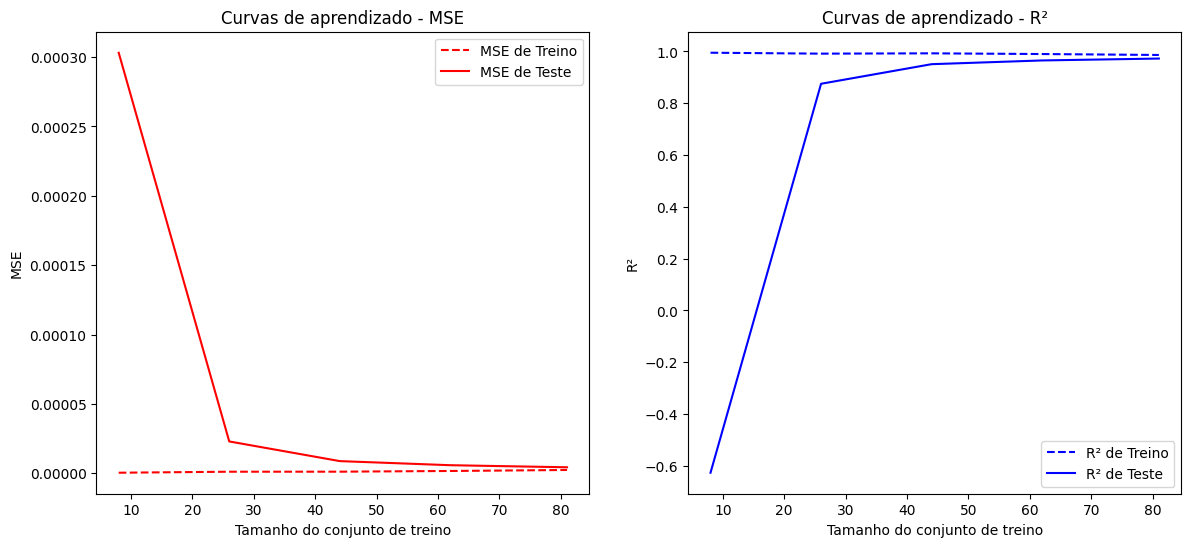

In [ ]:
# e agora, gerar as curvas de aprendizado pras métricas

neg_mse_scorer = make_scorer (mean_squared_error, greater_is_better = False)
r2_scorer = make_scorer (r2_score)

train_sizes, train_mse_scores, test_mse_scores = learning_curve (modelo, X, Y, cv = 5, scoring = neg_mse_scorer)

train_mse_scores_mean = -np.mean (train_mse_scores, axis = 1)
test_mse_scores_mean = -np.mean (test_mse_scores, axis = 1)

train_sizes, train_r2_scores, test_r2_scores = learning_curve (modelo, X, Y, cv = 5, scoring = r2_scorer)

train_r2_scores_mean = np.mean (train_r2_scores, axis = 1)
test_r2_scores_mean = np.mean (test_r2_scores, axis = 1)

fig, (ax1, ax2) = plt.subplots (1, 2, figsize = (14, 6))  #-> vamo configurar pros gráficos ficarem lado a lado

ax1.plot (train_sizes, train_mse_scores_mean, label = 'MSE de Treino', color = 'red', linestyle = '--')
ax1.plot (train_sizes, test_mse_scores_mean, label = 'MSE de Teste', color = 'red')
ax1.set_xlabel ('Tamanho do conjunto de treino')
ax1.set_ylabel ('MSE')
ax1.set_title ("Curvas de aprendizado - MSE")
ax1.legend(loc = "best")

ax2.plot (train_sizes, train_r2_scores_mean, label = 'R² de Treino', color = 'blue', linestyle = '--')
ax2.plot (train_sizes, test_r2_scores_mean, label = 'R² de Teste', color = 'blue')
ax2.set_xlabel ('Tamanho do conjunto de treino')
ax2.set_ylabel ('R²')
ax2.set_title ("Curvas de aprendizado - R²")
ax2.legend(loc = "best")

plt.tight_layout
plt.show()

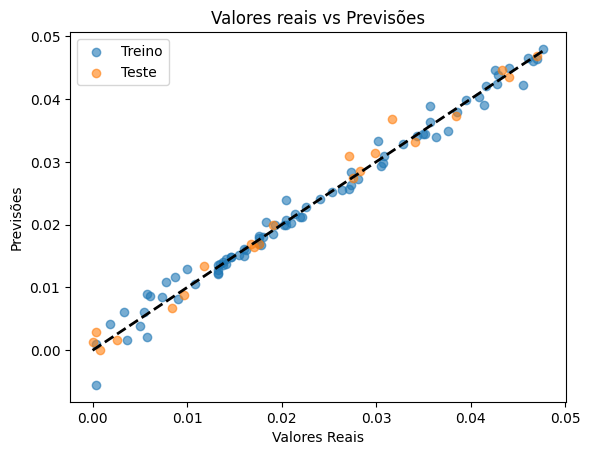

In [ ]:
y_pred_treino = modelo.predict (X_treino)
y_pred_teste = modelo.predict (X_teste)

plt.scatter (Y_treino, y_pred_treino, label = 'Treino', alpha = 0.6)
plt.scatter (Y_teste, y_pred_teste, label = 'Teste', alpha = 0.6)
plt.plot ([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw = 2)
plt.xlabel ("Valores Reais")
plt.ylabel ("Previsões")
plt.legend()
plt.title  ("Valores reais vs Previsões")
plt.show()

In [ ]:
# vamo fzr uma validação cruzada pra analisar a métrica nos subconjuntos

X, Y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
modelo = LinearRegression()
scores = cross_val_score (modelo, X, Y, cv = 10, scoring = 'r2')   #-> vamo usar 10 folds e usar o R² como métrica

print("Scores de R² para cada fold:", scores)
print("R² médio:", np.mean(scores))
print("Desvio padrão do R²:", np.std(scores))

Scores de R² para cada fold: [0.99999934 0.99999935 0.99999917 0.99999856 0.9999999  0.99999945
 0.9999994  0.99999791 0.9999995  0.9999988 ]
R² médio: 0.9999991386140404
Desvio padrão do R²: 5.390584098771718e-07


In [ ]:
# vamo fazer uma análise dos coeficientes do modelo pra gente entender melhor a relação entre as variáveis

X = sm.add_constant(X)  #-> vamo add uma constante pra interceptação
modelo = sm.OLS(Y, X).fit()  #-> vamo ajustar o modelo

print (modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.238e+07
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          6.45e-297
Time:                        16:02:15   Log-Likelihood:                 95.428
No. Observations:                 100   AIC:                            -178.9
Df Residuals:                      94   BIC:                            -163.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.010     -0.087      0.9

In [ ]:
# vamo verificar a multicolinearidade com o VIF com as variáveis

variaveis_independentes = df_insta [['boxcox_seguidores', 'boxcox_media_de_curtidas_novas']]
variaveis_independentes = sm.add_constant (variaveis_independentes)  #-> add uma constante pra interceptação
vif = pd.DataFrame()  #-> cria um DataFrame com as informações

vif ["Variável"] = variaveis_independentes.columns
vif ["VIF"] = [variance_inflation_factor (variaveis_independentes.values, i) for i in range (variaveis_independentes.shape [1])]
print (vif)

                         Variável       VIF
0                           const  4.818660
1               boxcox_seguidores  1.151858
2  boxcox_media_de_curtidas_novas  1.151858


- sem multicolinearidade
- VIFs menores que 5

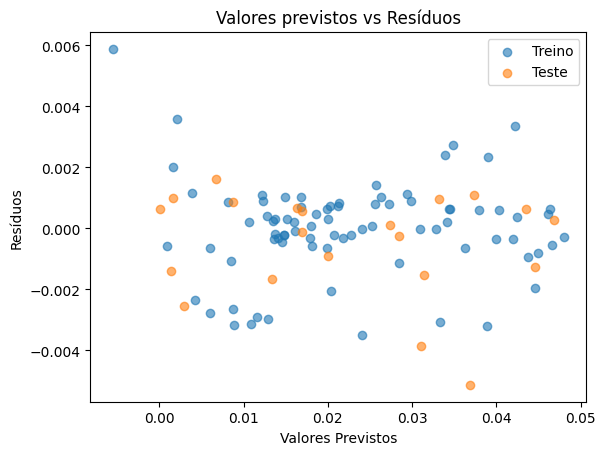

In [ ]:
# agora vamo fzr um gráfico de dispersão de resíduos vs valores previstos

residuos_teste = Y_teste - y_pred_teste
residuos_treino = Y_treino - y_pred_treino

plt.scatter (y_pred_treino, residuos_treino, label = 'Treino', alpha = 0.6)
plt.scatter (y_pred_teste, residuos_teste, label = 'Teste', alpha = 0.6)
plt.xlabel ("Valores Previstos")
plt.ylabel ("Resíduos")
plt.legend()
plt.title  ("Valores previstos vs Resíduos")
plt.show()

In [ ]:
# vamo confirmar a heterocedasticidade com o teste de Breusch-Pagan
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X = sm.add_constant (X)  #-> aqi a gente add a constante
modelo = sm.OLS (Y, X).fit()  #-> cria e treina o modelo inicial
teste_bp = het_breuschpagan (modelo.resid, modelo.model.exog)  #-> faz o teste

print ("Estatística do teste:", teste_bp [0])
print ("P-valor:", teste_bp [1])
print ("F-statistic:", teste_bp [2])
print ("P-valor F-statistic:", teste_bp [3])

Estatística do teste: 6.573699686047507
P-valor: 0.2543232320920618
F-statistic: 1.3228133157621846
P-valor F-statistic: 0.2611964969614853


- sem indícios de heterocedasticidade
- gráfico sem padrão e dispersos em torno de zero
- p-valor bem maior que 0.05

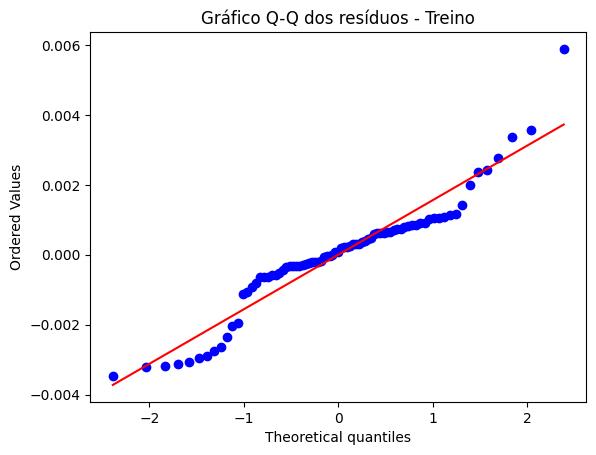

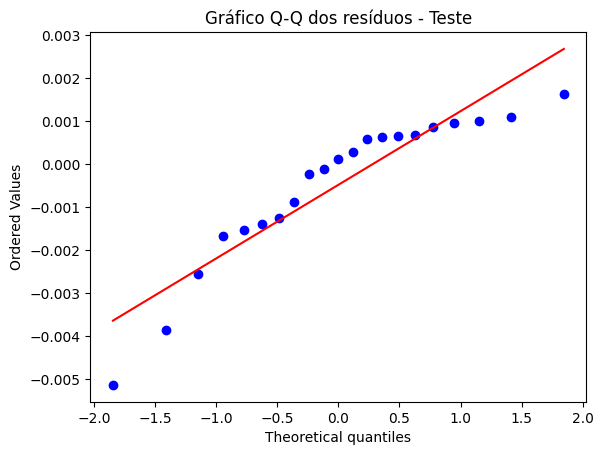

In [ ]:
# vamo gerar tbm um gráfico Q-Q dos resíduos

import scipy.stats as stats

stats.probplot (residuos_treino, dist = "norm", plot = plt)
plt.title ("Gráfico Q-Q dos resíduos - Treino")
plt.show()

stats.probplot (residuos_teste, dist = "norm", plot = plt)
plt.title ("Gráfico Q-Q dos resíduos - Teste")
plt.show()

- padrão aproximadamente normal, com aluns pontos desviados
- pode ter relação com a relaçõ não-linear entre 'seguidores' e 'taxa_de_engajamento